## Introduction

***

### Keras and Tensorflow
Keras is a deep learning API built on top of the Tensorflow machine learning platform. Tensorflow provides high level abstraction and gives the user the tools needed to develop machine learning solutions to solve complex problems. This project content will be based artificial neural networks called autoencoders and will explore Timeseries anomoly detection while leveraging the Keras documentation located on the [Keras website](https://keras.io/examples/timeseries/timeseries_anomaly_detection/). Lets take a look at what can be expected in this project:
- *Background Section* walking through Time Series Anomoly Detection, Neural Networks and Autoencoders.
- *Getting Started Section* where we have a look at the data used in documentation
- Neural Network Section..
- Evaluation Section..

## Background
### Time Series Anomoly Detection

Time series data can be thought of as a collection of data points gathered over time intervals. Evaluating this data allows us to trend how something changes over time and potentially helps us understand the underlying causes of the trends. 
<br>

An anomoly in a dataset can be thought of as an outlier where a datapoint differs significantly from the rest. For obvious reasons there is great benifit to identifying outliers in one's data to help identify potential risks. Bhattacharya (2020) helps describe the importance of detecting anomalies by detailing how companies constantly need to evaluate the "new normal" in the data to ultimately drive business decisions. He then details how one can appraoch this problem via Un-supervised nerual networks. Before exploring the keras variation of this (Autoencoders) lets take a step back and talk about Neural Networks.

###  Neural Networks  

Neural Networks are comprised of inter-connected layers of artificial neurons called nodes that perform operations on input to potentially yield an optimised output for a given problem **[Koech, 2022]**. As detailed by  Kostadinov (2019) a model typically trains itself through a process known as the "Chain Rule", where every feed forward through a network undergoes a back-propagation step where the weights and biases are adjusted based on the gradient of the cost function (we will explore cost functions in more detail later). Let's have a look at single neuron to help understand how they work (See Figure 1 below).

In the single neruron below we can see the inputs labelled as x<sub>1</sub> and x<sub>2</sub> have weights (w<sub>k1</sub>, w<sub>k2</sub>) and a Bias (b<sub>k</sub>) applied to them before being passed through an activation function (φ) to yield the output (y<sub>k</sub>). We can summarise the actions of the single neuron below with an equation that describe how the output is the activated weighted sum of the inputs.

*Equation for a Neuron with 2 inputs:* <br>
<span style="font-size:larger;">y<sub>k</sub> = φ( (w<sub>k1</sub> x<sub>1</sub>    + w<sub>k2</sub> x<sub>2</sub>) + b<sub>k</sub>) </span>

<img src="images/neural_network_image.png" width="800">
Figure 1. [Saxena, 2020]  

Lets explore the actions of a neuron in more detail before moving on to Autoencoders. The weights in a network determine dictate how important a given feature is in a model, for example a weights close to zero indicates that this input is not an important feature in the model. Weights help correlate relationships between features in the data dataset to target values. The idea here is that weights can moderate the association between features to prevent positive association on the summation process if the relationship is not positive, for example if we just sum the input data and the bias without multiplying them by the optimal weights we would result in a scenario where feature relationships are purely associative or dis-associative **[Ganesh (2020)]**. 

As per Ganesh (2020) lets explore a scenario where we have two input features and we want to perform binary classification. Figure 2 below shows two classes of data and the activation function using a neural network with weights (red) and without weights (black). The use of weights allows you to alter the slope of the line to better fit your model, whearas without weights the activation function of x<sub>2</sub> = -x<sub>1</sub>  + b has a constant slope of -1. Note that altering the bias just moves the activation function to the left or right and many different types of activation functions exist (we will explore this more later).

In [1]:
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks.
import tensorflow.keras as keras

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})

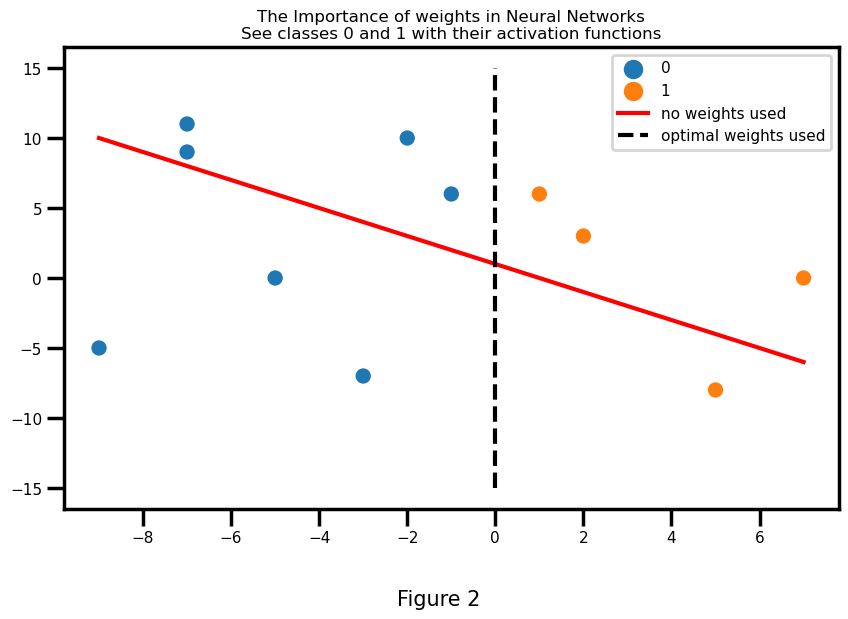

In [2]:
# two input arrays
x1 = np.array([-9,  1, -5, -3,  5, -7, 2, -2, 7, -7, -1])
x2 = np.array([-5,  6,  0, -7, -8, 11, 3, 10, 0, 9, 6])
xclass = [0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]
bias = 1

# dataframe for plotting
df = pd.DataFrame({'x1':x1, 'x2':x2, 'class':xclass})

# plot code
fig, ax = plt.subplots(figsize = (10, 6))
plt.figtext(0.5, -0.05, 'Figure 2', wrap=True, horizontalalignment='center', fontsize=15);

# plot input arrays
sns.scatterplot(data=df, x=x1, y=x2, hue='class')

# plot x1 and predicted y value using eqn: (x2 = -x1 + bias)
sns.lineplot(data=df, x=x1, y =(-x1 + bias), color='red', label='no weights used')

# plot class boundary (activation function) a neural
# network could achieve with optimal weights
plt.plot([0, 0], [-15, 15], '--k', label = 'optimal weights used');

# format plot 
ax.title.set_text('The Importance of weights in Neural Networks\n\
See classes 0 and 1 with their activation functions')
plt.legend();

### Autoencoders  

An Autoencoder is a type of artifical neural network used to learn data encodings in an unsupervised manner, where the aim is to learn a lower-dimensational representation for higher dimenstional data **[Bandyopadhyay, 2022]**. This statement contains a lot of information, lets parse out the detail.

The ability of an Autoencoder to leverage the un-supervised learning approach allow us to draw insight from unlabelled data which is of great benifit as it can be very costly to label large datasets. The ANN's ability to transform data from higher to lower-dimensional space is very important as it can be very difficuly to interpret higher dimensional data. Think of a model trying to learn with a large number of input variables across 3 dimensions where the the important data needed to effectively train the model only occupies localised regions of the space. With such a scenario it could be computationally heavy to extract the relevant information from the space and could potentially lead to overfitting as more features are fed into the model, i.e: the model finds the best solution that may not be representative of the real world problem. Lets walk through figure 3 below to get a better understanding of how Autoencoders work.

As shown below they are comprised of an Input Layer, hidden layers (with a bottle neck) and an output layer. We can see that the encoding process occurs in the hidden layers before the bottelneck. The task of the encoder is compress the data to a lower dimension (as discussed presviously). This is achieved at the bottleneck as it forces information loss, this imperfect data is then passed through the decoder for de-compression and a reconstruction error is calculated (i.e difference between pre and post compression values). 

This reconstruction error can be leveraged when trying to detect anomalous data. Imagine an autoencoder model which was trained to the highest possible degree in the lower dimensional space. An outliar data point relative to the model would have a high reconstruction error and therefore be labelled as an anomoly.

<img src="images/autoencoder.png" width="700">
Figure 3. [Bandyopadhyay, 2022]

<h2>References:</h2>

<br> 

[1]. Bhattacharya, A, 2020, Effective Approaches for Time Series Anomaly Detection, Towards Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/effective-approaches-for-time-series-anomaly-detection-9485b40077f1) (Viewed 21 December 2022).

<br>

[2]. Bandyopadhyay, H, 2022, Autoencoders in Deep Learning: Tutorial & Use Cases, V7labs, available at:<br>
[Ref Link](https://www.v7labs.com/blog/autoencoders-guide) (Viewed 21 December 2022).

<br>

[3].Koech, K, 2022, The Basics of Neural Networks (Neural Network Series) — Part 1, Towards Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/the-basics-of-neural-networks-neural-network-series-part-1-4419e343b2b) (Viewed 22 December 2022).

<br>


[4] Saxena, A, 2020, Building a Simple Neural Network from Scratch, Towards Data Science, available at:<br>[Ref Link](https://miro.medium.com/max/640/1*UWJ52M5qNZp-38j11STT5g.webp) (Viewed 22 December 2022).

<br>

[5]. Ganesh, S, 2020, What’s The Role Of Weights And Bias In a Neural Network?, Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/whats-the-role-of-weights-and-bias-in-a-neural-network-4cf7e9888a0f) (Viewed X December 2023). ******* Figure 2*******

<br>

[6].JORDAN, J, 2018, Introduction to autoencoders. Data Science, available at:<br>
[Ref Link](https://www.jeremyjordan.me/autoencoders/) (Viewed 23 December 2022).


<br>

[7]. S, Kostadinov, 2019, Understanding Backpropagation Algorithm, Towards Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd) (Viewed 23 December 2022).

<br>

[8]. x, y, 202-, ..., ..., available at:<br>
[Ref Link](link here) (Viewed X December 2022).

<br>


[9]. x, y, 202-, ..., ..., available at:<br>
[Ref Link](link here) (Viewed X December 2022).

<br>


[10]. x, y, 202-, ..., ..., available at:<br>
[Ref Link](link here) (Viewed X December 2022).

<br>

# Evaluation

***

https://keras.io/examples/timeseries/timeseries_anomaly_detection/

In [3]:
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks.
import tensorflow.keras as keras

# Plotting
import matplotlib.pyplot as plt

## Data

***

https://www.kaggle.com/datasets/boltzmannbrain/nab

https://github.com/numenta/NAB

In [4]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

In [5]:
no_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

In [6]:
with_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'

In [7]:
# 
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

In [8]:
# 
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [9]:
# 
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


In [10]:
# 
df_small_noise.iloc[0]

value    18.324919
Name: 2014-04-01 00:00:00, dtype: float64

In [11]:
# 
df_small_noise.iloc[0]['value']

18.3249185392

In [12]:
# 
df_small_noise.iloc[0].values[0]

18.3249185392

In [13]:
# 
df_small_noise.iloc[0].values[0] * 10e12

183249185392000.0

In [14]:
# 
df_small_noise.shape

(4032, 1)

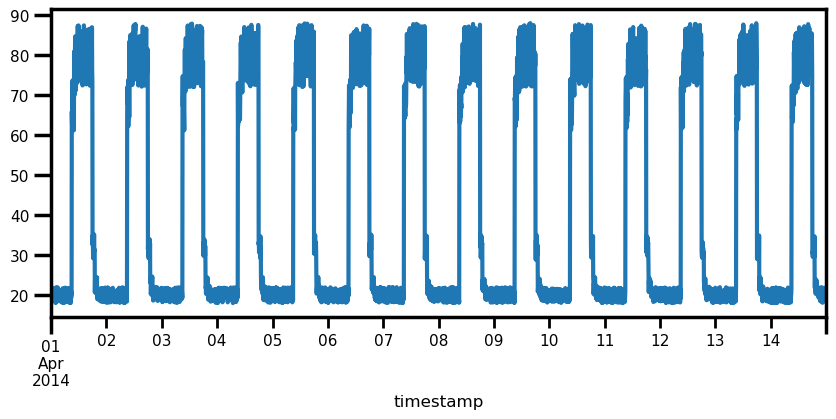

In [15]:
# 
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax);

In [16]:
#
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [17]:
# 
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [18]:
# 
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


In [19]:
# 
df_daily_jumpsup.iloc[0]['value']

19.761251903

In [20]:
# 
df_daily_jumpsup.shape

(4032, 1)

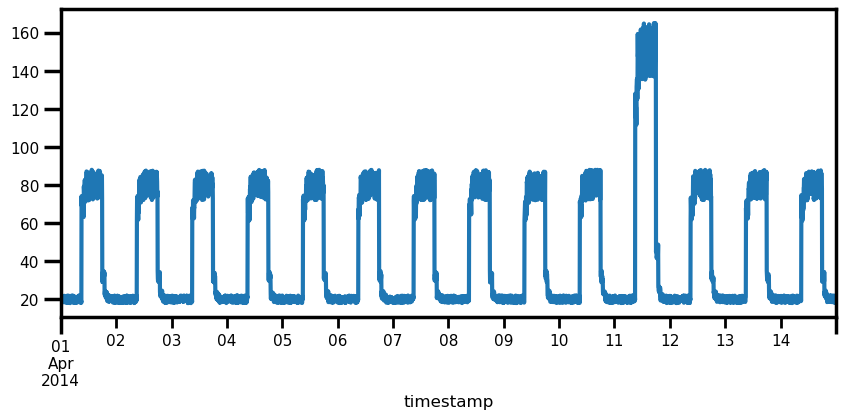

In [21]:
# 
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax);

## Preprocessing

***

In [22]:
# 
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

In [23]:
# 
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

In [24]:
# 
df_train_vals = (df_small_noise - train_mean) / train_std

In [25]:
# 
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


In [26]:
# 
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

In [27]:
df_small_noise

,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173
...,...,...,...
2014-04-14 23:35:00,20.211195,-22.227159,-0.791647
2014-04-14 23:40:00,20.531041,-21.907313,-0.780255
2014-04-14 23:45:00,19.032127,-23.406226,-0.833640


In [28]:
df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()

(42.438353335806646, -7.342627387941552e-14, -2.616541242931684e-15)

In [29]:
df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()

(28.077122281262515, 28.077122281262508, 1.0000000000000018)

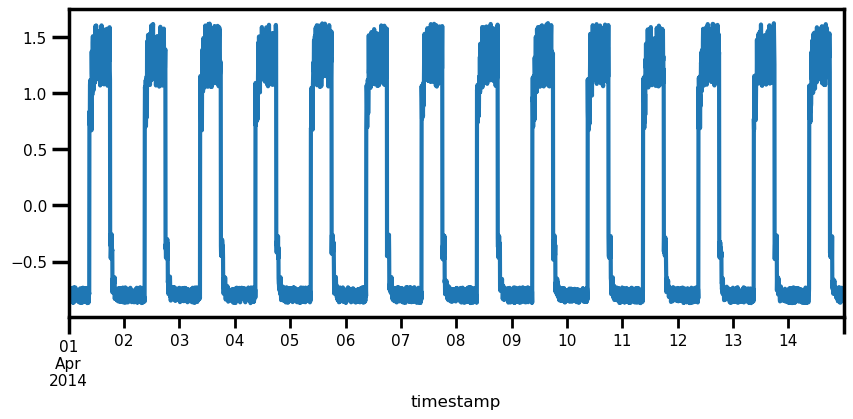

In [30]:
# 
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);

In [31]:
# 
df_train_vals.shape

(4032, 1)

In [32]:
# 
window_size = 288

Window example:

```python
[1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
window_size = 3
[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
...
```

In [33]:
# Window list example.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
# Example window size.
win_size = 3
# Length of L.
len(L)

12

In [34]:
# Number of windows from L.
len(L) - (win_size - 1)

10

In [35]:
# Remove brackets.
len(L) - win_size + 1

10

In [36]:
# Print the windows.
for i in range(len(L) - win_size + 1):
    print(L[i:i + win_size])

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 1]
[7, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]


In [37]:
# For accumulating the windows.
wins = []

# Generate the windows
for i in range(len(L) - win_size + 1):
    wins.append(L[i:i + win_size])

wins

[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

In [38]:
# Create a 2D numpy array from wins.
np.stack(wins)

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [39]:
# 
def windows(vals, N=window_size):
  # 
  L = []
  # 
  for i in range(len(vals) - N + 1):
    # 
    L.append(vals[i:i+N])
  # Stack
  return np.stack(L)

In [40]:
# 
x_train = windows(df_train_vals)

In [41]:
# 
x_train[0][0], x_train[-1][-1]

(array([-0.85882857]), array([-0.8460886]))

In [42]:
# 
df_train_vals.iloc[0], df_train_vals.iloc[-1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.846089
 Name: 2014-04-14 23:55:00, dtype: float64)

In [43]:
# 
x_train.shape

(3745, 288, 1)

In [44]:
#
df_train_vals['value'].values

array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

In [45]:
# 
x_train[0].flatten()

array([-0.85882857, -0.72899302, -0.84814772, -0.72958579, -0.731173  ,
       -0.75730984, -0.77645641, -0.7880838 , -0.747012  , -0.829166  ,
       -0.80377285, -0.7821597 , -0.81182078, -0.80949918, -0.82334701,
       -0.79001779, -0.74922405, -0.84169024, -0.73727717, -0.77223023,
       -0.75311352, -0.79116337, -0.75934728, -0.86809294, -0.75381057,
       -0.86468256, -0.74361965, -0.72908121, -0.82850668, -0.84043795,
       -0.76136364, -0.8343536 , -0.74708881, -0.85574949, -0.85245676,
       -0.73090636, -0.77440264, -0.74974936, -0.82419543, -0.77402585,
       -0.78574242, -0.7844733 , -0.77316412, -0.78843253, -0.80927467,
       -0.83109167, -0.76090519, -0.83816509, -0.77176485, -0.83715923,
       -0.78131343, -0.76396862, -0.83924191, -0.86186112, -0.85174179,
       -0.78406773, -0.74938477, -0.86399047, -0.76581026, -0.82177506,
       -0.80222751, -0.73807119, -0.82310669, -0.80410682, -0.86845167,
       -0.85877599, -0.83356075, -0.86643297, -0.78045221, -0.80

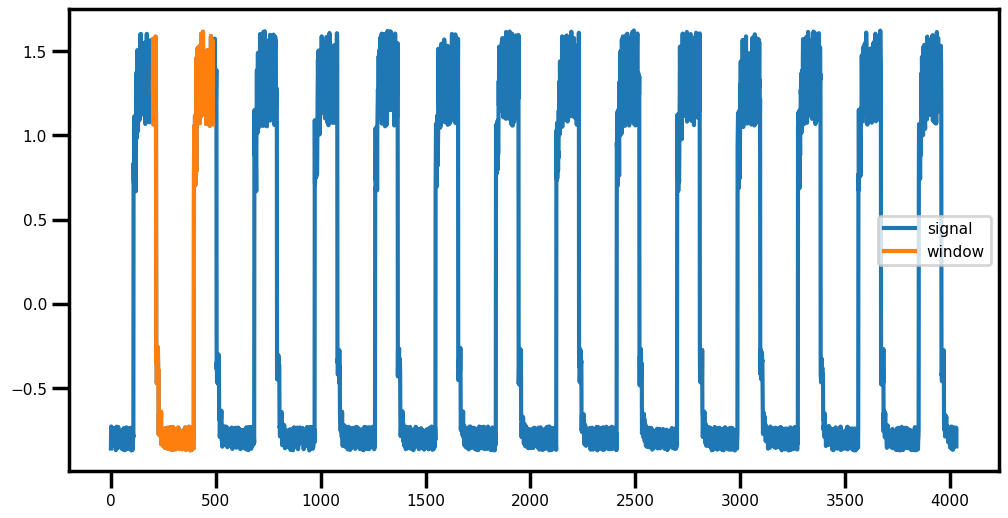

In [46]:
# 
window_no = 200

# 
fig, ax = plt.subplots(figsize=(12, 6))

# 
y = df_train_vals['value'].values

# 
ax.plot(np.arange(y.shape[0]), y, label='signal')

# The first window.
w = x_train[window_no].flatten()

# 
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')

ax.legend();

## Neural Network

***

In [47]:
x_train.shape

(3745, 288, 1)

In [48]:
#
layers = [
  #
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  #
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

In [49]:
#
model = keras.Sequential(layers)

In [50]:
# 
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [51]:
# 
model.compile(optimizer=optimizer, loss="mse")

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

In [53]:
# 
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 69ms/step - loss: 0.5815 - val_loss: 0.1138
Epoch 2/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0852 - val_loss: 0.0473
Epoch 3/50
27/27 [==============================] - 2s 60ms/step - loss: 0.0577 - val_loss: 0.0392
Epoch 4/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0499 - val_loss: 0.0347
Epoch 5/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0431 - val_loss: 0.0294
Epoch 6/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0370 - val_loss: 0.0255
Epoch 7/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0327 - val_loss: 0.0225
Epoch 8/50
27/27 [==============================] - 2s 58ms/step - loss: 0.0296 - val_loss: 0.0204
Epoch 9/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0274 - val_loss: 0.0206
Epoch 10/50
27/27 [==============================] - 2s 58ms/step - loss: 0.0257 - val_loss: 0.0211
Epoch 11/

## Evaluation

***

In [54]:
history.history["loss"]

[0.5815222263336182,
 0.0852445513010025,
 0.05770031362771988,
 0.04986422881484032,
 0.043058838695287704,
 0.037010833621025085,
 0.03265779837965965,
 0.029626546427607536,
 0.02737249806523323,
 0.025673100724816322,
 0.024390239268541336,
 0.023278221487998962,
 0.022321870550513268,
 0.021585267037153244,
 0.02096330001950264,
 0.020225580781698227,
 0.019674988463521004,
 0.019117409363389015,
 0.018708474934101105,
 0.018153509125113487,
 0.017627637833356857,
 0.01707995869219303,
 0.016593268141150475,
 0.016111183911561966,
 0.015658672899007797,
 0.01522025279700756,
 0.014735561795532703,
 0.014266672544181347,
 0.013853403739631176,
 0.013539670035243034,
 0.01310752984136343,
 0.012721722945570946,
 0.012337081134319305,
 0.011928749270737171,
 0.011628546752035618,
 0.011326509527862072,
 0.01099486742168665,
 0.010707182809710503,
 0.010486187413334846,
 0.01026125717908144]

In [55]:
history.history["val_loss"]

[0.1138143390417099,
 0.047308534383773804,
 0.03922565281391144,
 0.03465277701616287,
 0.029405085369944572,
 0.02546638809144497,
 0.022459497675299644,
 0.020444663241505623,
 0.020552240312099457,
 0.021078746765851974,
 0.02044341340661049,
 0.0202072411775589,
 0.01993359811604023,
 0.019656188786029816,
 0.01992756873369217,
 0.01934531144797802,
 0.019018694758415222,
 0.018009532243013382,
 0.017521508038043976,
 0.017222389578819275,
 0.016412384808063507,
 0.016593962907791138,
 0.015740472823381424,
 0.015339533798396587,
 0.0146332373842597,
 0.014058506116271019,
 0.013754344545304775,
 0.012836421839892864,
 0.013107815757393837,
 0.011835962533950806,
 0.011825618334114552,
 0.012519776821136475,
 0.010758817195892334,
 0.01229230035096407,
 0.009910443797707558,
 0.011166148819029331,
 0.010415845550596714,
 0.010813629254698753,
 0.010189066641032696,
 0.010510439053177834]

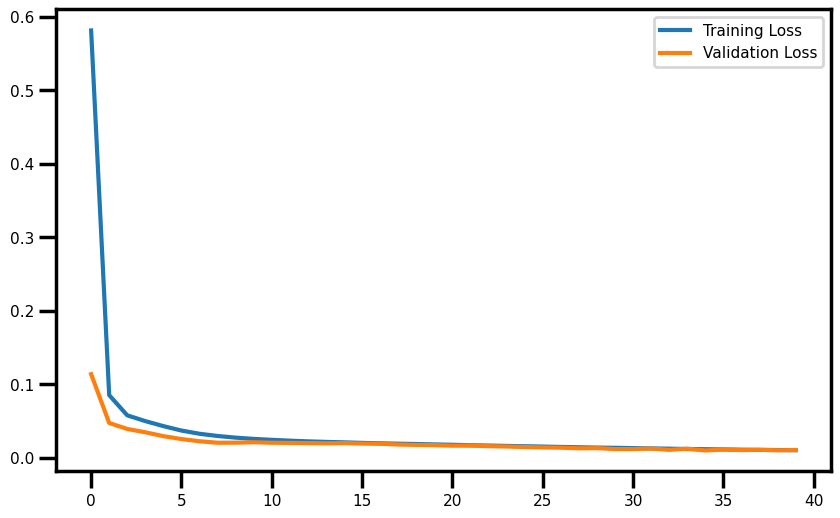

In [56]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.plot(history.history["loss"], label="Training Loss")
# 
ax.plot(history.history["val_loss"], label="Validation Loss")
# 
ax.legend();

In [57]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)

118/118 [==============================] - 1s 6ms/step


In [58]:
# Calculate loss...
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

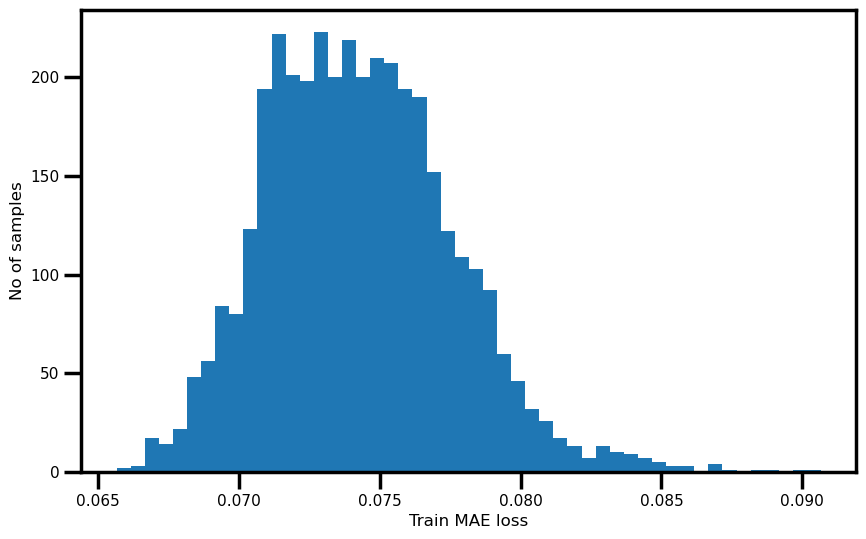

In [59]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.hist(train_mae_loss, bins=50)
# 
ax.set_xlabel("Train MAE loss")
#
ax.set_ylabel("No of samples");

In [60]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)

# 
threshold

0.09066466312046201

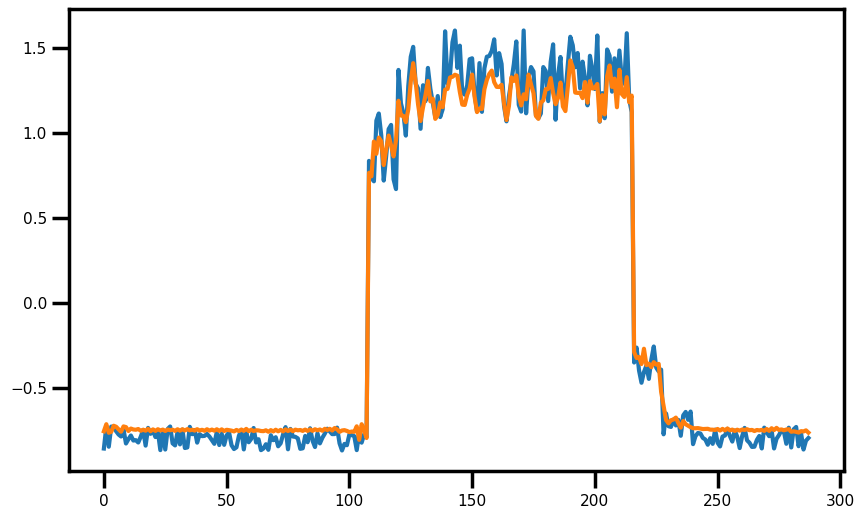

In [61]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
ax.plot(x_train[0])

# 
ax.plot(x_train_pred[0]);

In [62]:
# 
df_test_value = (df_daily_jumpsup - train_mean) / train_std

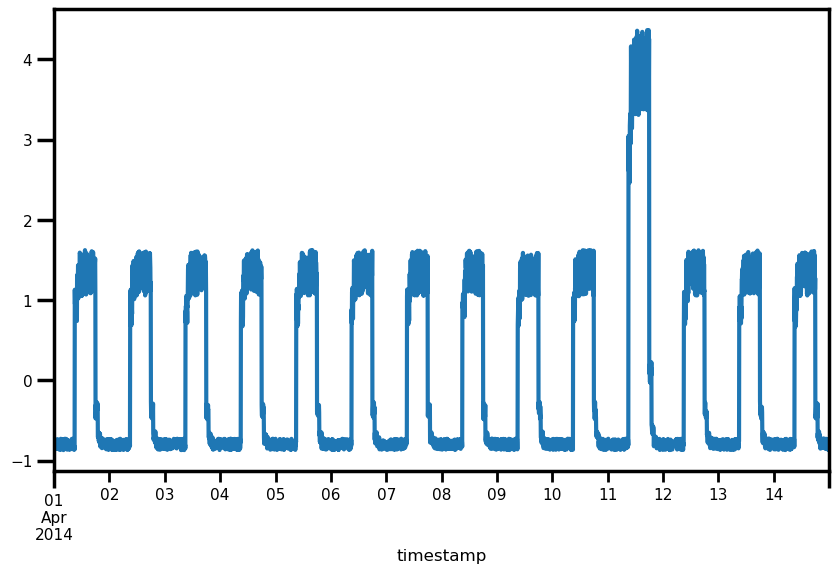

In [63]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_test_value.plot(legend=False, ax=ax);

In [64]:
# Create sequences from test values.
x_test = windows(df_test_value.values)

x_test.shape

(3745, 288, 1)

In [65]:
# 
x_test_pred = model.predict(x_test)

118/118 [==============================] - 1s 6ms/step


In [66]:
# 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

test_mae_loss

array([[0.07127626],
       [0.07627058],
       [0.07382668],
       ...,
       [0.07246895],
       [0.07381503],
       [0.07074936]])

In [67]:
# 
test_mae_loss = test_mae_loss.reshape((-1))

test_mae_loss

array([0.07127626, 0.07627058, 0.07382668, ..., 0.07246895, 0.07381503,
       0.07074936])

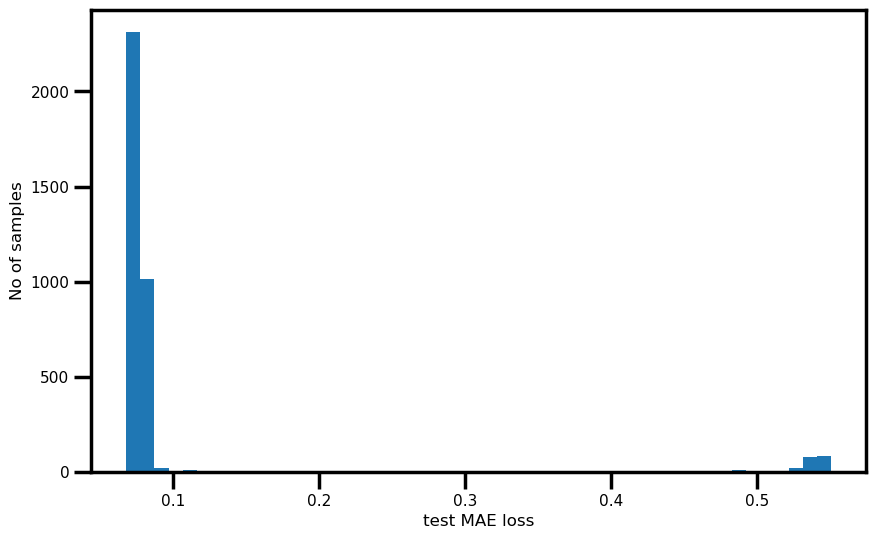

In [68]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

#
ax.hist(test_mae_loss, bins=50)

# 
ax.set_xlabel("test MAE loss")

# 
ax.set_ylabel("No of samples");

In [69]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# NUmber of anomalies.
np.sum(anomalies)

401

In [70]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

In [71]:
# 
df_subset = df_daily_jumpsup.iloc[inds]

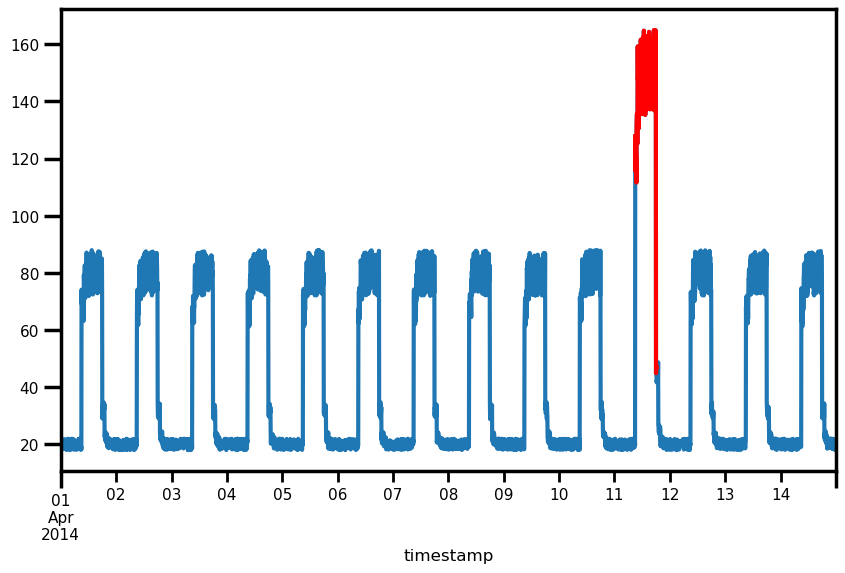

In [72]:
#
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_daily_jumpsup.plot(legend=False, ax=ax)

# 
df_subset.plot(legend=False, ax=ax, color="r");

***

## End